In [1]:
import os
import sys
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
import psycopg2
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
DBNAME = "king_county_housing_prices"
conn = psycopg2.connect(dbname=DBNAME)

In [3]:
data = pd.read_sql("""
            SELECT DISTINCT
                   rps.major
                   ,rps.minor
                   ,rps.documentdate :: date
                   ,rps.saleprice
                   ,rb.zipcode
                   ,rb.stories
                   ,rb.buildinggrade
                   ,rb.squarefeettotalliving
                   ,rb.squarefeettotalbasement
                   ,rb.squarefeetopenporch
                   ,rb.squarefeetenclosedporch
                   ,rb.squarefeetdeck
                   ,p.township
                   ,p.districtname
                   ,p.lotsquarefootage
                   ,p.streetsurface
                   ,p.restrictivesizeshape
                   ,p.inadequateparking
                   ,p.percentunusable
                   ,p.waterfrontlocation
                   ,p.trafficnoise
                   ,p.airportnoise
                   ,p.powerlines
                   ,p.othernuisances
            FROM real_property_sales rps
            JOIN residential_building rb 
                 ON rb.major = rps.major
                 AND rb.minor = rps.minor
            JOIN parcel p 
                 ON p.major = rps.major
                 AND p.minor = rps.minor
            WHERE (rps.propertytype = '12' OR rps.propertytype = '14' OR rps.propertytype = '18' OR rps.propertytype = '11')
                        AND (rps.principaluse = '2' OR rps.principaluse = '6')
                        AND (rps.documentdate > '2018-12-31' and rps.documentdate < '2020-01-01')
                        AND (rb.squarefeettotalliving > 800 AND rb.squarefeettotalliving  < 4500)
                        AND (rps.saleprice > 10.00 AND rps.saleprice < 2500000)
                   """,conn)

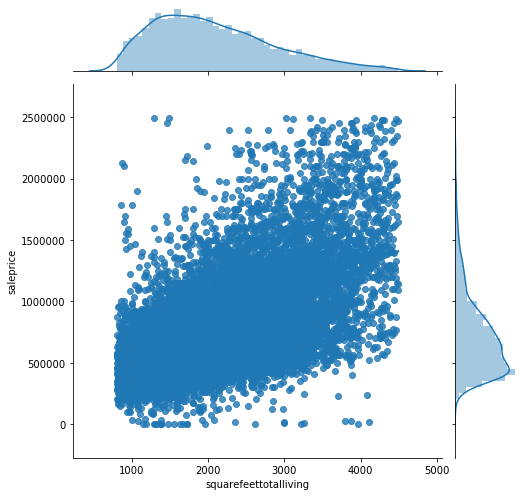

In [4]:
sns.jointplot(x="squarefeettotalliving", y="saleprice", data=data, kind = 'reg', height = 7)
plt.show()

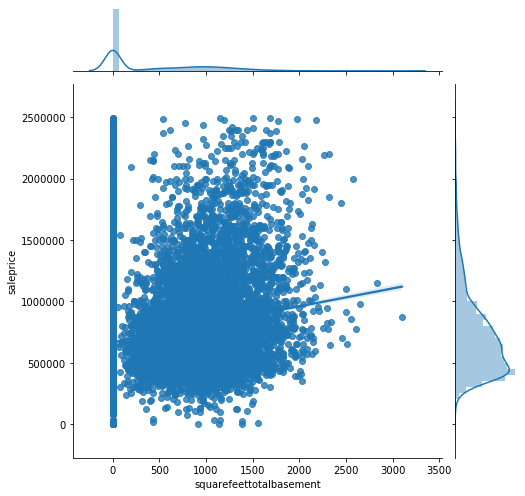

In [5]:
sns.jointplot(x="squarefeettotalbasement", y="saleprice", data=data, kind = 'reg', height = 7)
plt.show()

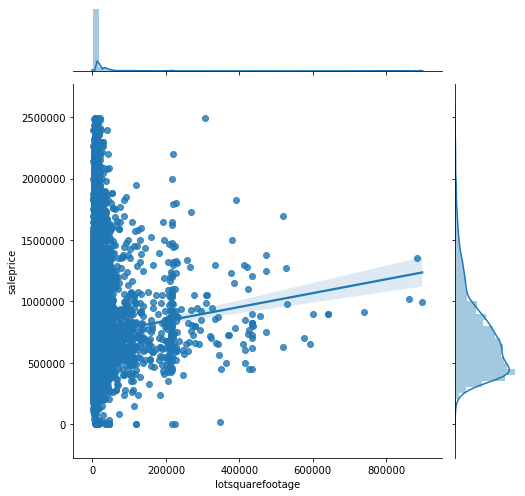

In [6]:
sns.jointplot(x="lotsquarefootage", y="saleprice", data=data, kind = 'reg', height = 7)
plt.show()